# O Algoritmo K-Nearest Neighbors 

Em estatística, o algoritmo **K-Nearest Neighbors** (k-NN) é um método de classificação não paramétrico desenvolvido pela primeira vez por Evelyn Fix e Joseph Hodges em 1951, e posteriormente expandido por Thomas Cover. 

É usado para classificação e regressão. Em ambos os casos, o **input** consiste nos k exemplos de treinamento mais próximos no conjunto de dados. O **output** depende se k-NN é usado para classificação ou regressão:

- Na classificação k-NN, o **output** é uma associação de classe. Um objeto é classificado por uma pluralidade de votos de seus vizinhos, com o objeto sendo atribuído à classe mais comum entre seus **k** vizinhos mais próximos (k é um número inteiro positivo, tipicamente pequeno). Se `k = 1`, então o objeto é simplesmente atribuído à classe daquele único vizinho mais próximo.
- Na regressão k-NN, o **output** é o valor da propriedade do objeto. Este valor é a média dos valores dos **k** vizinhos mais próximos.

Mais detalhes podem ser encontrados no [Wikipedia](https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm)

Começamos importando as bibliotecas básicas necessárias.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

Carregamos os nossos dados em um **DataFrame** pandas.

Estamos trabalhando com dados de expressão genética e a relação com a presença de câncer ou não.

Para mais detalhes você pode ler o artigo: [Gene Expression Level](https://www.sciencedirect.com/topics/biochemistry-genetics-and-molecular-biology/gene-expression-level)

In [2]:
df = pd.read_csv('dados/gene_expression.csv')
df.head()

,Gene One,Gene Two,Cancer Present
0,4.3,3.9,1
1,2.5,6.3,0
2,5.7,3.9,1
3,6.1,6.2,0
4,7.4,3.4,1


Vamos visualizar esses dados com um **scatterplot** para melhor intuição.

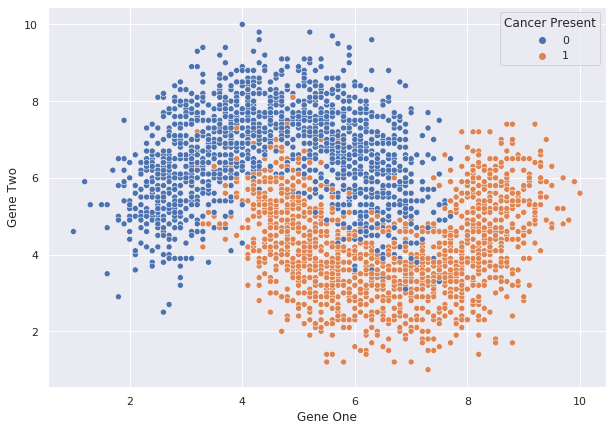

In [11]:
sns.set(rc={'figure.figsize':(10,7)})
sns.scatterplot(data=df, x='Gene One', y='Gene Two', hue='Cancer Present');

Como podemos ver, temos bastantes dados aglomerados, é possível que tenhamos pontos empilhados.

Vejamos a quantidade de dados que estamos trabalhando.

In [5]:
len(df)

3000

Através do parâmetro **alpha** podemos visualizar melhor os dados em um **scatterplot**.

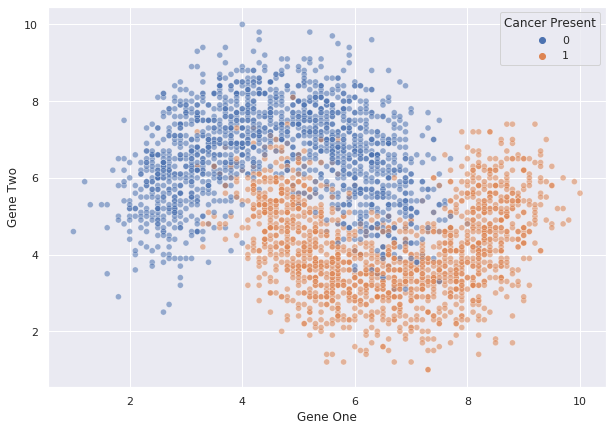

In [12]:
sns.scatterplot(data=df, x='Gene One', y='Gene Two', hue='Cancer Present', alpha=0.55);

Também podemos focar o nosso gráfico para ver melhor os detalhes.

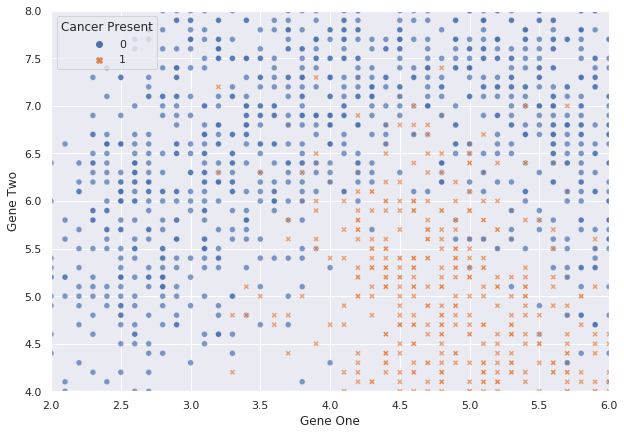

In [15]:
sns.scatterplot(data=df, x='Gene One', y='Gene Two', hue='Cancer Present', alpha=0.7, style='Cancer Present');
plt.xlim(2,6);
plt.ylim(4,8);

O **pairplot** também ajuda a visualizarmos os dados, uma vez que ele também mostra as distribuições.

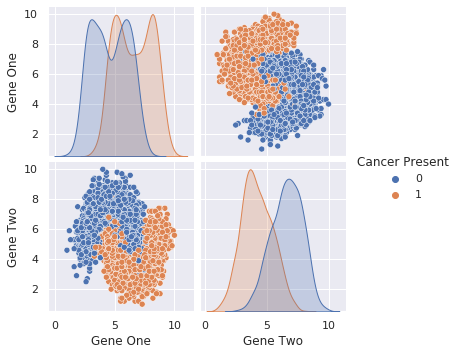

In [16]:
sns.pairplot(data=df, hue='Cancer Present');

Feita uma análise e visualização básica de nossos dados, vamos prepará-los para o algoritmo classificador que decidirá a presença de câncer baseada na expressão de dois genes.

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

Separamos os dados em **features** e **labels**.

In [18]:
X = df.drop('Cancer Present', axis=1)
y = df['Cancer Present']

E agora dividimos eles em conjuntos de **treinamento** e **teste**.

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

Escalamos os dados para facilitar o trabalho do algoritmo.

In [20]:
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

E construímos e treinamos o nosso Modelo.

In [21]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=1)
knn_model.fit(scaled_X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

Uma vez que o nosso modelo está treinado, já somos capazes de fazer previsões.

In [22]:
y_pred = knn_model.predict(scaled_X_test)
y_pred[:10]

array([0, 1, 0, 1, 1, 1, 1, 0, 0, 0])

E finalmente, medimos o desempenho de nosso algoritmo com uma matriz de confusão e um classification report.

In [23]:
from sklearn.metrics import confusion_matrix, classification_report 

confusion_matrix(y_test, y_pred)

array([[394,  45],
       [ 37, 424]])

De 900 previsões no total, estamos classificando 82 incorretamente.

In [27]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.90      0.91       439
           1       0.90      0.92      0.91       461

    accuracy                           0.91       900
   macro avg       0.91      0.91      0.91       900
weighted avg       0.91      0.91      0.91       900



Temos uma boa avalição nos quesitos **precision** e **recall**, o que indica, aparentemente, que não estamos lidando com classes não-balanceadas.

Podemos confirmar com a função **value_counts()**.

In [28]:
df['Cancer Present'].value_counts()

1    1500
0    1500
Name: Cancer Present, dtype: int64

De fato, as classes estão perfeitamente balanceadas.

Vamos agora tentar melhor o desempenho de nosso modelo ao configurar diferentes valores para **k**.

In [29]:
from sklearn.metrics import accuracy_score

test_error_rates = []

for k in range(1,30):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(scaled_X_train, y_train)
    
    y_pred_test = knn_model.predict(scaled_X_test)
    
    test_error = 1 - accuracy_score(y_test, y_pred_test)
    test_error_rates.append(test_error)

E agora podemos ver as taxas de erros de teste.

In [30]:
test_error_rates

[0.09111111111111114,
 0.08666666666666667,
 0.08333333333333337,
 0.0788888888888889,
 0.07333333333333336,
 0.07666666666666666,
 0.07222222222222219,
 0.07444444444444442,
 0.07111111111111112,
 0.06666666666666665,
 0.06444444444444442,
 0.06666666666666665,
 0.06333333333333335,
 0.06000000000000005,
 0.05777777777777782,
 0.05666666666666664,
 0.05888888888888888,
 0.05888888888888888,
 0.06000000000000005,
 0.05777777777777782,
 0.06222222222222218,
 0.06000000000000005,
 0.06000000000000005,
 0.06000000000000005,
 0.06000000000000005,
 0.061111111111111116,
 0.06222222222222218,
 0.06222222222222218,
 0.06222222222222218]

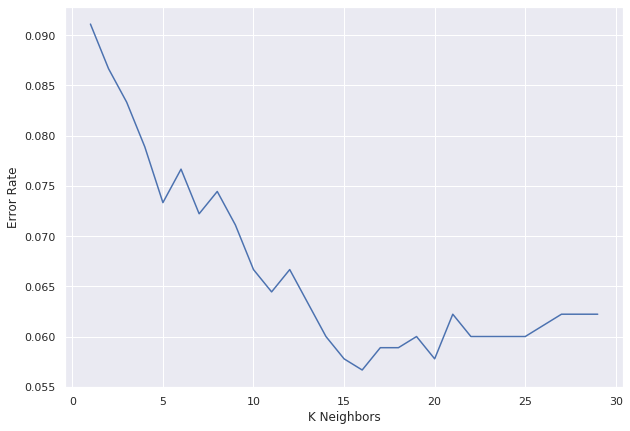

In [32]:
plt.plot(range(1,30), test_error_rates);
plt.ylabel('Error Rate');
plt.xlabel('K Neighbors');

Também podemos estabelecer uma **Pipeline** para otimizar o nosso workflow.

Pipeline de Machine Learning é uma maneira de codificar e automatizar o fluxo de trabalho necessário para produzir um modelo de Machine Learning. Os pipelines de ML consistem em várias etapas sequenciais que fazem tudo, desde a extração e pré-processamento de dados até o treinamento do modelo.

Também executaremos o **GridSearchCV**, uma ferramenta útil para ajustar os hiperparâmetros de nosso modelo.

In [33]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

scaler = StandardScaler()
knn = KNeighborsClassifier()

operations = [('scaler',scaler),('knn',knn)]
pipe = Pipeline(operations)

k_values = list(range(1,20))
param_grid = {'knn__n_neighbors': k_values}

full_cv_classifier = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy')

E agora ajustamos os dados ao modelo.

In [34]:
full_cv_classifier.fit(X_train, y_train);

Podemos ver qual é o melhor estimador encontrado.

In [42]:
full_cv_classifier.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler',
   StandardScaler(copy=True, with_mean=True, with_std=True)),
  ('knn',
   KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                        metric_params=None, n_jobs=None, n_neighbors=19, p=2,
                        weights='uniform'))],
 'verbose': False,
 'scaler': StandardScaler(copy=True, with_mean=True, with_std=True),
 'knn': KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                      metric_params=None, n_jobs=None, n_neighbors=19, p=2,
                      weights='uniform'),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 19,
 'knn__p': 2,
 'knn__weights': 'uniform'}

E ver qual a melhor combinação de hiperparâmetros.

In [43]:
full_cv_classifier.best_params_

{'knn__n_neighbors': 19}

E agora avaliamos o nosso modelo final.

In [45]:
full_pred = full_cv_classifier.predict(X_test)

print(classification_report(y_test, full_pred))

              precision    recall  f1-score   support

           0       0.94      0.93      0.94       439
           1       0.94      0.95      0.94       461

    accuracy                           0.94       900
   macro avg       0.94      0.94      0.94       900
weighted avg       0.94      0.94      0.94       900



In [46]:
confusion_matrix(y_test, full_pred)

array([[409,  30],
       [ 24, 437]])

Observamos que com a **Pipeline** e o método **GridSearchCV** nosso modelo foi capaz de melhorar o seu desempenho significativamente.

Agora vamos definir um novo paciente hipotético e fazer uma previsão com base nos seus dados.

In [49]:
new_patient = np.array([[3.8, 6.4]])

full_cv_classifier.predict(new_patient)[0]

0

Nos é reportado que este paciente em específico não possui câncer.

Também podemos prever em termos de probabilidade.

In [50]:
full_cv_classifier.predict_proba(new_patient)

array([[0.84210526, 0.15789474]])

Nosso modelo está indicando que existe **84%** de chance deste paciente não ter câncer.